## Trading 

In [1]:
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as lm
import statsmodels.formula.api as sm
import statsmodels.tools.tools as ct
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statsmodels.regression.rolling import RollingOLS
import math
import yfinance as yf

In [2]:
a = yf.Ticker('^GSPC')

In [3]:
a1 = a.history(period ='5y')

In [4]:
a1.drop(columns = ['Volume', 'Dividends', 'Stock Splits'], inplace = True)
a1.head(3)

,Open,High,Low,Close
Date,,,,
2017-12-11 00:00:00-05:00,2652.189941,2660.330078,2651.469971,2659.989990
2017-12-12 00:00:00-05:00,2661.729980,2669.719971,2659.780029,2664.110107
2017-12-13 00:00:00-05:00,2667.590088,2671.879883,2662.850098,2662.850098


 ### What is this actually doing to the data?

.rolling automatically takes the intervals of the data given (e.g. daily). The window specified is '20' & '200'. The mean is there too average those last 20 or 200 days and take that as the value.

In [19]:
a1['20_avg'] = a1["Close"].rolling(20).mean()
a1['200_avg'] = a1["Close"].rolling(200).mean()
a1['400_avg'] = a1["Close"].rolling(400).mean()
a1['500_avg'] = a1["Close"].rolling(500).mean()

a1.head()

,Open,High,Low,Close,20_avg,200_avg,400_avg,500_avg
Date,,,,,,,,
2017-12-11 00:00:00-05:00,2652.189941,2660.330078,2651.469971,2659.989990,NaN,NaN,NaN,NaN
2017-12-12 00:00:00-05:00,2661.729980,2669.719971,2659.780029,2664.110107,NaN,NaN,NaN,NaN
2017-12-13 00:00:00-05:00,2667.590088,2671.879883,2662.850098,2662.850098,NaN,NaN,NaN,NaN
2017-12-14 00:00:00-05:00,2665.870117,2668.090088,2652.010010,2652.010010,NaN,NaN,NaN,NaN
2017-12-15 00:00:00-05:00,2660.629883,2679.629883,2659.139893,2675.810059,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

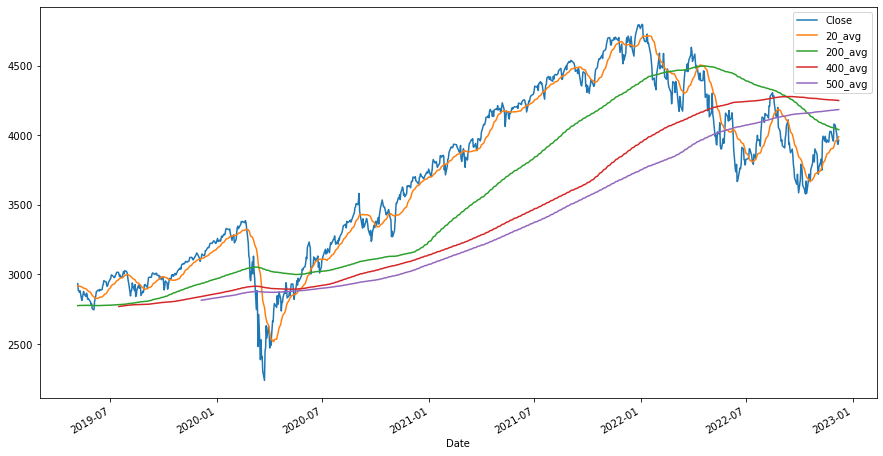

In [24]:
df_1 = a1[["Close", "20_avg","200_avg","400_avg","500_avg"]]
df_1.iloc[350:,:].plot(figsize = [15,8])

<br>

In [13]:
a12 = yf.download(['CVX','COP','EOG','PXD','XOM','SLB','EPD','MPC','OXY','^GSPC'], period = '5y')
a12.head(3)

[*********************100%***********************]  10 of 10 completed


Adj Close                                                         \
                  COP        CVX        EOG        EPD        MPC        OXY   
Date                                                                           
2017-12-11  44.253914  96.709846  85.644386  17.571709  53.552265  59.931309   
2017-12-12  44.485073  96.115562  84.857407  17.737156  53.577187  60.388332   
2017-12-13  44.245361  96.316338  84.569687  17.854347  53.294735  60.336601   

                                                           ...   Volume  \
                   PXD        SLB        XOM        ^GSPC  ...      COP   
Date                                                       ...            
2017-12-11  132.728638  55.324406  63.841286  2659.989990  ...  4040400   
2017-12-12  132.996292  54.998772  63.633720  2664.110107  ...  6200200   
2017-12-13  131.381851  54.244656  63.910500  2662.850098  ...  4906800   

                                                                               \
                CVX      EOG       EPD      MPC        OXY      PXD       SLB   
Date                                                                            
2017-12-11  5929700  1946800  11908800  2768800  2855800.0  1766100  11702900   
2017-12-12  4300200  2127600   7027700  2591600  6178700.0  1248000   6487800   
2017-12-13  4399800  1426900   6864500  2966100  3985800.0   947100   7485600   

                                  
                 XOM       ^GSPC  
Date                              
2017-12-11   8760700  3141480000  
2017-12-12  11307000  3568910000  
2017-12-13  10172700  3568360000  

[3 rows x 60 columns]

<AxesSubplot:xlabel='Date'>

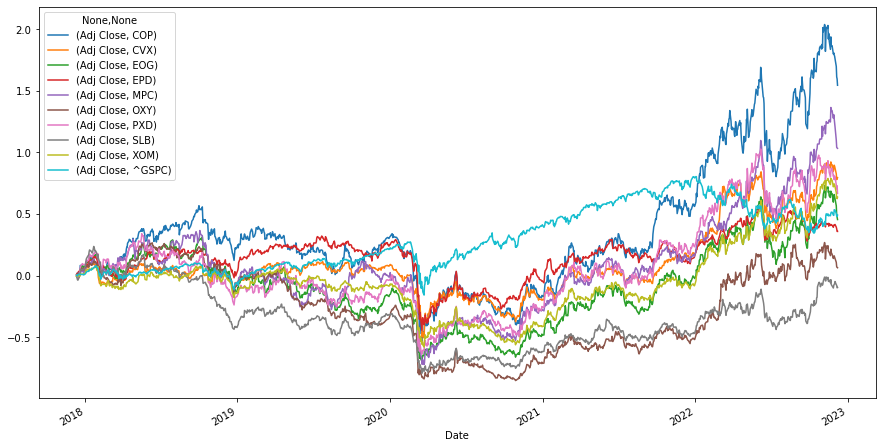

In [14]:
df_2 = a12[["Adj Close"]]
df_returns = df_2.pct_change(1)

((df_returns + 1).cumprod() - 1).plot(figsize = [15,8])